### Sklearn实现SVM，使用高斯核

In [105]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle

In [106]:
def loadDataSet(fileName):
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split('\t')
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat,labelMat


In [107]:
X,y = loadDataSet('data/svm2.txt')

### kernel='rbf'表示使用高斯核

In [108]:
model = SVC(C=1,kernel='rbf')
model.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
print('各类别各有多少个支持向量',model.n_support_)
print('各类别的支持向量在训练样本中的索引',model.support_)
print('各类所有的支持向量',model.support_vectors_)
print('支持向量的值',model.dual_coef_)

各类别各有多少个支持向量 [30 29]
各类别的支持向量在训练样本中的索引 [ 0  6 15 17 21 25 27 30 36 41 42 43 46 48 53 58 59 65 76 78 81 82 85 87
 88 90 91 92 93 99  3  7  9 13 14 16 18 19 23 26 28 29 33 34 40 45 50 51
 52 54 56 60 61 62 71 74 75 80 94]
各类所有的支持向量 [[-2.14824e-01  6.62756e-01]
 [-5.57789e-01  3.75797e-01]
 [ 4.90767e-01 -6.80029e-01]
 [-3.56048e-01  5.37960e-01]
 [-4.75167e-01 -3.46247e-01]
 [ 4.02158e-01  5.77744e-01]
 [ 6.19080e-01 -8.81880e-02]
 [ 5.39368e-01 -3.74972e-01]
 [-4.03483e-01  4.74466e-01]
 [-1.29980e-02  5.25985e-01]
 [ 1.53738e-01  4.91531e-01]
 [ 3.88215e-01 -6.56567e-01]
 [ 7.47800e-01 -6.66300e-02]
 [-7.01600e-01  1.90983e-01]
 [ 5.95222e-01  2.09570e-01]
 [-3.07768e-01  5.03038e-01]
 [-7.77063e-01 -3.48066e-01]
 [-7.55431e-01  9.67110e-02]
 [ 3.34204e-01  3.81237e-01]
 [ 2.27222e-01  5.27437e-01]
 [ 5.77939e-01  4.03784e-01]
 [-5.68534e-01  4.42948e-01]
 [ 2.97885e-01 -6.32874e-01]
 [ 5.41359e-01 -2.05969e-01]
 [-6.89946e-01 -5.08674e-01]
 [ 5.23902e-01 -4.36156e-01]
 [ 2.49281e-01 -

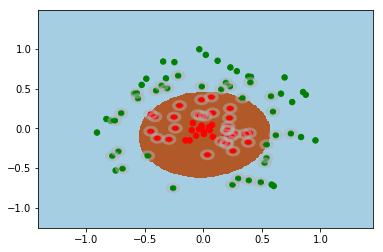

In [110]:
#画图
fig = plt.figure()
ax = fig.add_subplot(111)

#画决策边界
h = .01
x_min, x_max = np.array(X)[:, 0].min() - .5, np.array(X)[:, 0].max() + .5
y_min, y_max = np.array(X)[:, 1].min() - .5, np.array(X)[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

#画数据点
cm_dark = mpl.colors.ListedColormap(['g', 'r'])
plt.scatter(np.array(X)[:,0],np.array(X)[:,1],c=np.array(y).squeeze(),cmap=cm_dark,s=30)
#画支持向量
alphas_non_zeros_index = model.support_
for i in alphas_non_zeros_index:
    circle = Circle((X[i][0], X[i][1]), 0.05, facecolor='none', edgecolor=(0.7,0.7,0.7), linewidth=3, alpha=0.5)
    ax.add_patch(circle)
plt.show()